In [1]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set working directory
os.chdir(os.path.dirname(os.getcwd()))
project_path = os.getcwd()
print(project_path)

/ceph01/homedirs/ibarra/master_thesis


In [3]:
# Load local libraries
from src.get_info_from_name import get_info_from_name
from src.logger import set_logger as sl

In [4]:
# Load file with metadata
ukbb = pd.read_csv("./data/ukbb_metadata.csv")
ukbb.head()

,file,sex,patient_id,eye_side,visit,replica
0,1000180_21015_0_0.png,female,1000180,left,0,0
1,1000180_21016_0_0.png,female,1000180,right,0,0
2,1000303_21015_1_0.png,female,1000303,left,1,0
3,1000303_21016_1_0.png,female,1000303,right,1,0
4,1000390_21015_1_0.png,male,1000390,left,1,0


## Eye side

In [5]:
ukbb.eye_side.value_counts()

right    88156
left     86830
Name: eye_side, dtype: int64

In [6]:
ukbb.eye_side.value_counts()/ukbb.shape[0]

right    0.503789
left     0.496211
Name: eye_side, dtype: float64

## Female/Male distribution

### CFP

In [7]:
ukbb.sex.value_counts()

female    93753
male      81233
Name: sex, dtype: int64

In [8]:
ukbb.sex.value_counts()/ukbb.shape[0]

female    0.535774
male      0.464226
Name: sex, dtype: float64

### Patients

In [9]:
# Number of unique patients
ukbb.patient_id.unique().shape[0]

85623

In [10]:
# Number of patients per sex
for by, df in ukbb.groupby("sex"):
    print(by, df.patient_id.unique().shape[0], df.patient_id.unique().shape[0]/ukbb.patient_id.unique().shape[0], sep="\t")

female	45948	0.5366315125608774
male	39675	0.4633684874391227


## Images

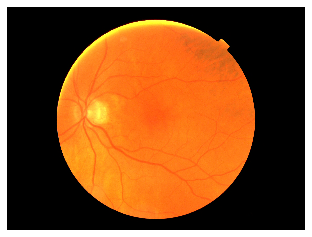

In [11]:
data_path = f"/home/ibarra/EyeCandy/ukbb/data/{ukbb.file.sample(n=1, random_state=42).values[0]}"

img = cv2.imread(f"{data_path}")

plt.matshow(img[:,:,::-1])
plt.axis("off")
plt.show()

In [12]:
print(img.shape)

(1536, 2048, 3)
